<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means法

# データなどの準備

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
means=X.mean()
sd =X.std()
X_ = (X-means)/sd
y=pd.Series(iris.target)

In [0]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


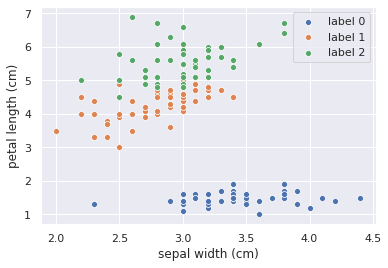

In [7]:
x1="sepal width (cm)"
x2 ="petal length (cm)"
for k in range(3):
    X_0=X[y==k]
    sns.scatterplot(x=x1,y=x2,data=X_0,label="label {}".format(k))
plt.legend()
plt.savefig("iris_namay.png")

# クラスの実装

In [0]:
class Kmeans:
    def __init__(self,K,X):
        np.random.seed(1)
        self.X=X
        self.K=K
        self.N=len(X)
        self.K_n = np.zeros((len(X),K))
        self.J=np.zeros_like(self.K_n)
        for i in range(len(X)):
            a=np.random.randint(0,K)
            self.K_n[i,a]=1
        self.mu=(np.dot(self.X.T, self.K_n)/np.sum(self.K_n, axis=0)).T
        self.J_all=np.array([])        

    def classfication(self):
        self.J=np.zeros((self.N, self.K))
        self.K_n = np.zeros((self.N, self.K))
        for i in range(self.N):
            for k in range(self.K):
                self.J[i,k]=np.linalg.norm(self.X.iloc[i,:]-self.mu[k,:])**2
            k_n=np.argmin(self.J[i,:])
            self.K_n[i,k_n]=1
        self.mu=(np.dot(self.X.T,self.K_n)/np.sum(self.K_n,axis=0)).T
        self.J_all=np.append(self.J_all, np.sum(self.J))

    def calc(self,iter):
        for i in range(iter):
            self.classfication()
        self.result={"class":self.K_n, "loss":self.J_all}
        return self.result

    def plot_loss(self):
        plt.plot(self.J_all)
    
    def plot_class(self):
        Mu = pd.DataFrame(self.mu , columns=self.X.columns )
        x1="sepal width (cm)"
        x2 ="petal length (cm)"
        for k in range(self.K):
            X_0=self.X[self.K_n[:,k] ==1]
            sns.scatterplot(x=x1,y=x2,data=X_0,label="label {}".format(k))
        sns.scatterplot(x=x1,y=x2,s=300,marker="*", data=Mu, label="center" )
        plt.legend()
        plt.savefig("iris_class.png")

In [0]:
iris_class=Kmeans(K=3,X=X)

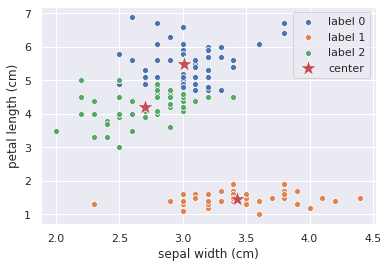

In [14]:
iris_class.calc(iter=5)
iris_class.plot_class()
